In [1]:
!pip install pyarrow seaborn --upgrade --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read data
df = pd.read_csv('traffic.csv')

In [4]:
df

,holiday,temp_F,rain_mm,snow_mm,cloud_cover_%,weather_type,date_time,traffic_volume
0,NaN,59.23,0.0,0.0,40,Clouds,2012-10-02 09:00:00,5545
1,NaN,61.18,0.0,0.0,75,Clouds,2012-10-02 10:00:00,4516
2,NaN,61.57,0.0,0.0,90,Clouds,2012-10-02 11:00:00,4767
3,NaN,62.56,0.0,0.0,90,Clouds,2012-10-02 12:00:00,5026
4,NaN,64.38,0.0,0.0,75,Clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...
43707,NaN,81.90,0.0,0.0,1,Clear,2018-04-30 19:00:00,3259
43708,NaN,79.77,0.0,0.0,1,Clear,2018-04-30 20:00:00,2673
43709,NaN,76.66,0.0,0.0,1,Clear,2018-04-30 21:00:00,2329
43710,NaN,74.25,0.0,0.0,40,Clouds,2018-04-30 22:00:00,1594


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43712 entries, 0 to 43711
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         56 non-null     object 
 1   temp_F          43712 non-null  float64
 2   rain_mm         43712 non-null  float64
 3   snow_mm         43712 non-null  float64
 4   cloud_cover_%   43712 non-null  int64  
 5   weather_type    43712 non-null  object 
 6   date_time       43712 non-null  object 
 7   traffic_volume  43712 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.7+ MB


In [6]:
# there are only 56 holidays non-null, check values
df['holiday'].unique()
# out of the 56 non-null, there are only 11 unique. this will most likely need a pandas dummy. 
df['holiday'].nunique()
# for rest of null values, fill value not-a-holiday
df['holiday'] = df['holiday'].fillna('not-a-holiday')

In [7]:
#  there should not be any nulls anymore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43712 entries, 0 to 43711
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         43712 non-null  object 
 1   temp_F          43712 non-null  float64
 2   rain_mm         43712 non-null  float64
 3   snow_mm         43712 non-null  float64
 4   cloud_cover_%   43712 non-null  int64  
 5   weather_type    43712 non-null  object 
 6   date_time       43712 non-null  object 
 7   traffic_volume  43712 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.7+ MB


In [8]:
# first convert to pandas datetime
df['day'] = pd.to_datetime(df['date_time']).dt.day
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['year'] = pd.to_datetime(df['date_time']).dt.year
df['dayofweek'] = pd.to_datetime(df['date_time']).dt.dayofweek
df['time'] = pd.to_datetime(df['date_time']).dt.time
df['time_int'] = pd.to_datetime(df['date_time']).dt.strftime('%H%M%S').astype('int')

In [9]:
#null values
df.isnull().values.any()

False

In [10]:
#incorrect imputations
df[df.duplicated(keep=False)].transform(np.sort)

,holiday,temp_F,rain_mm,snow_mm,cloud_cover_%,weather_type,date_time,traffic_volume,day,month,year,dayofweek,time,time_int
358,not-a-holiday,-13.02,0.0,0.0,0,Clear,2012-10-17 09:00:00,216,1,1,2012,0,00:00:00,0
359,not-a-holiday,-13.02,0.0,0.0,0,Clear,2012-10-17 09:00:00,216,1,1,2012,0,00:00:00,0
403,not-a-holiday,-13.02,0.0,0.0,1,Clear,2012-10-19 04:00:00,245,1,1,2012,0,00:00:00,0
406,not-a-holiday,-13.02,0.0,0.0,1,Clear,2012-10-19 04:00:00,245,1,1,2012,0,00:00:00,0
432,not-a-holiday,-2.07,0.0,0.0,1,Clear,2012-10-19 22:00:00,266,1,1,2012,0,00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38675,not-a-holiday,72.72,0.0,0.0,100,Thunderstorm,2017-11-05 01:00:00,6702,31,12,2017,6,23:00:00,230000
38676,not-a-holiday,72.97,0.0,0.0,100,Thunderstorm,2017-11-05 01:00:00,6750,31,12,2017,6,23:00:00,230000
38677,not-a-holiday,72.97,0.0,0.0,100,Thunderstorm,2017-11-05 01:00:00,6750,31,12,2017,6,23:00:00,230000
39526,not-a-holiday,74.84,0.0,0.0,100,Thunderstorm,2017-12-05 18:00:00,6818,31,12,2017,6,23:00:00,230000


In [11]:
# get count of duplicates
sum(df.duplicated())

233

In [12]:
# there are 233 duplicates, drop them
df.drop_duplicates(inplace=True)
# get count of duplicates
sum(df.duplicated())
# duplicate count is 0 now. 

0

In [13]:
#Get details related to counts, mean, std, min, max, and quartiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_F,43479.0,44.263019,23.958917,-459.67,28.72,44.2,63.5,95.16
rain_mm,43479.0,0.348328,47.159364,0.00,0.00,0.0,0.0,9831.30
snow_mm,43479.0,0.000247,0.008600,0.00,0.00,0.0,0.0,0.51
cloud_cover_%,43479.0,49.708549,39.035087,0.00,1.00,64.0,90.0,100.00
traffic_volume,43479.0,3252.246326,1989.062961,0.00,1181.00,3360.0,4933.0,7280.00
day,43479.0,15.712344,8.716420,1.00,8.00,16.0,23.0,31.00
month,43479.0,6.452540,3.537657,1.00,3.00,6.0,10.0,12.00
year,43479.0,2015.268980,1.798572,2012.00,2013.00,2016.0,2017.0,2018.00
dayofweek,43479.0,2.984774,2.007759,0.00,1.00,3.0,5.0,6.00
time_int,43479.0,114122.679914,69486.215118,0.00,50000.00,110000.0,170000.0,230000.00


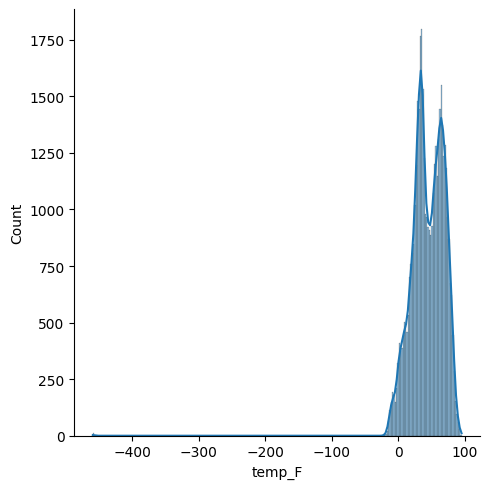

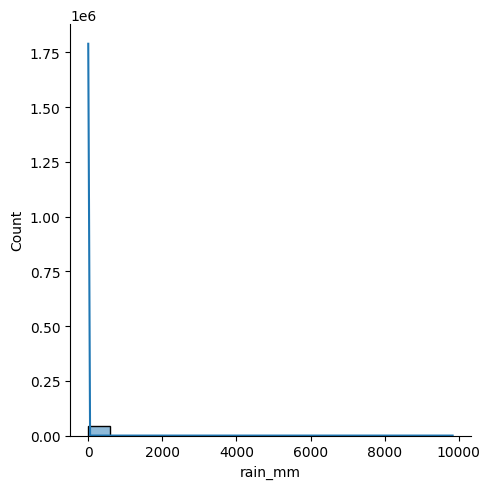

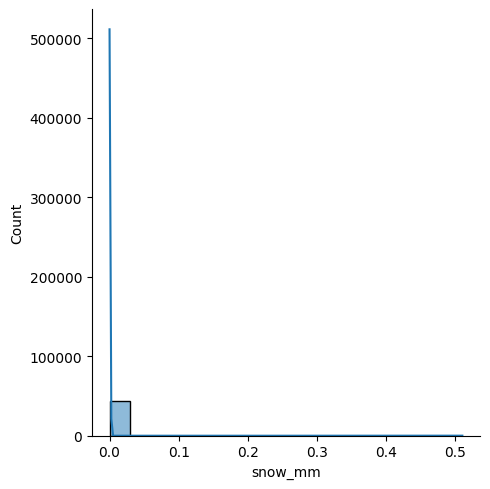

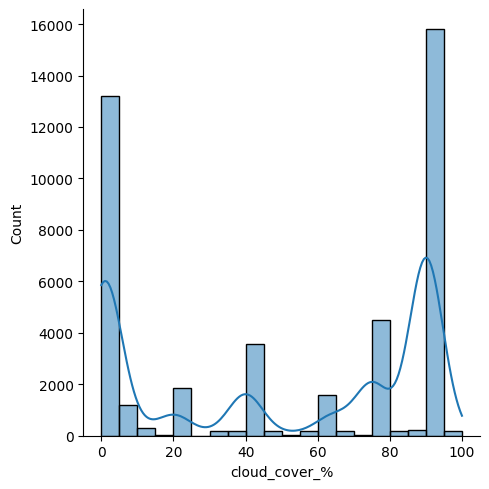

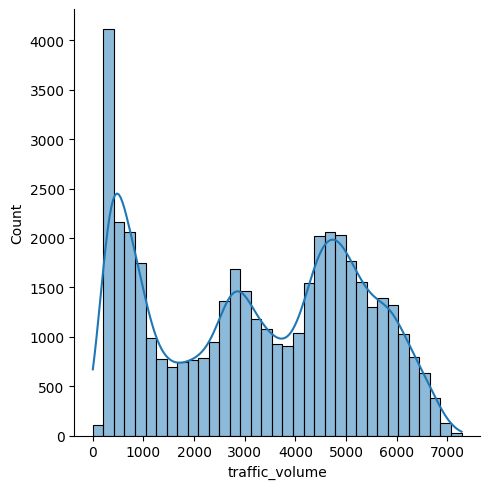

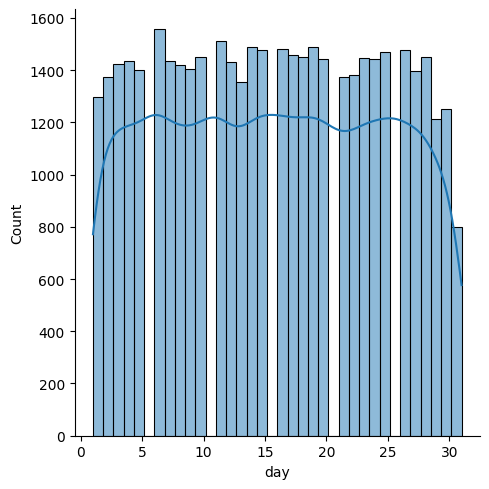

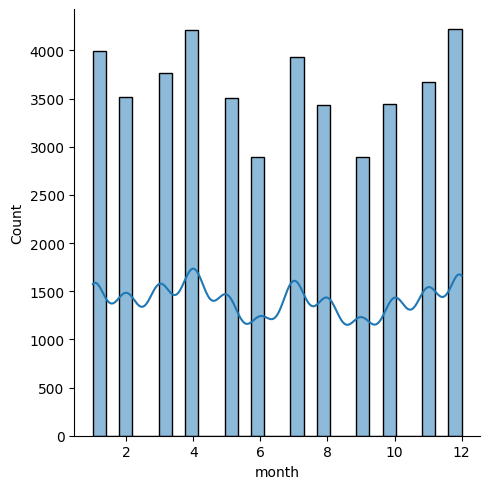

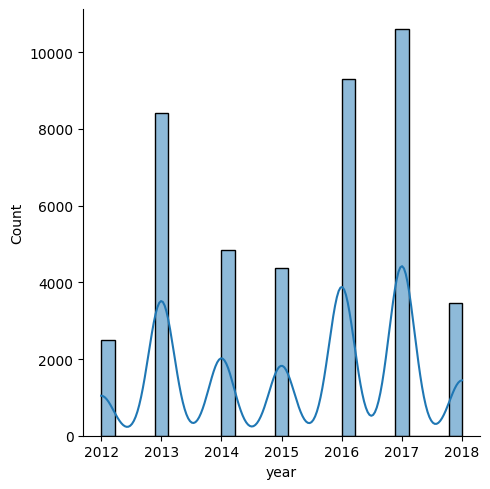

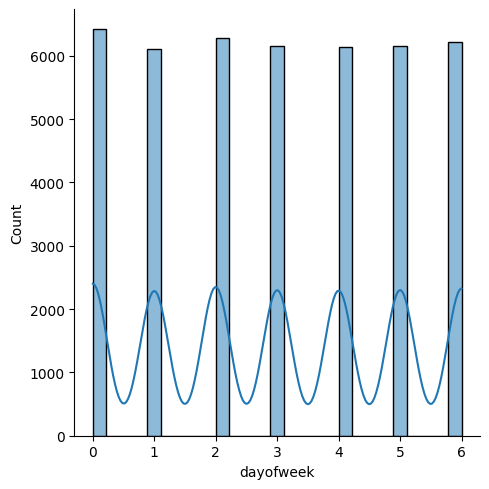

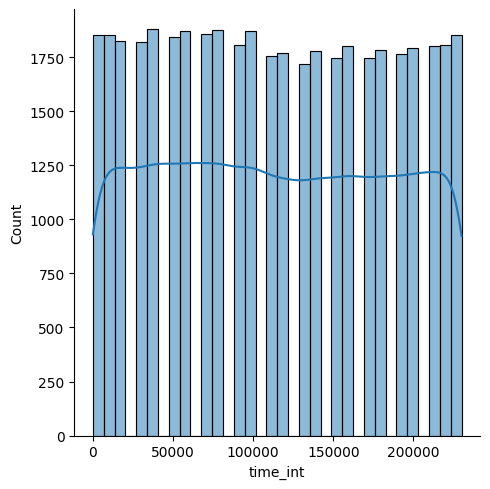

In [14]:
#get distribution plot
for col in ['temp_F', 'rain_mm', 'snow_mm', 'cloud_cover_%', 'traffic_volume', 'day', 'month', 'year', 'dayofweek', 'time_int']:
    ax = sns.displot(df[col], kde=True)
    plt.show()

In [15]:
df[df['temp_F'] < -50]

,holiday,temp_F,rain_mm,snow_mm,cloud_cover_%,weather_type,date_time,traffic_volume,day,month,year,dayofweek,time,time_int
11898,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-01-31 03:00:00,361,31,1,2014,4,03:00:00,30000
11899,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-01-31 04:00:00,734,31,1,2014,4,04:00:00,40000
11900,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-01-31 05:00:00,2557,31,1,2014,4,05:00:00,50000
11901,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-01-31 06:00:00,5150,31,1,2014,4,06:00:00,60000
11946,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-02-02 03:00:00,291,2,2,2014,6,03:00:00,30000
11947,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-02-02 04:00:00,284,2,2,2014,6,04:00:00,40000
11948,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-02-02 05:00:00,434,2,2,2014,6,05:00:00,50000
11949,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-02-02 06:00:00,739,2,2,2014,6,06:00:00,60000
11950,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-02-02 07:00:00,962,2,2,2014,6,07:00:00,70000
11951,not-a-holiday,-459.67,0.0,0.0,0,Clear,2014-02-02 08:00:00,1670,2,2,2014,6,08:00:00,80000


-459.67 is not accurate temperature. Replace with mean. Why mean? No specific reason. but this looks to be a typo. However, since the count is low, we can exclude as well.

In [16]:
df = df[df['temp_F'] >= -50]

In [17]:
df[df['rain_mm'] > 100]

,holiday,temp_F,rain_mm,snow_mm,cloud_cover_%,weather_type,date_time,traffic_volume,day,month,year,dayofweek,time,time_int
24872,not-a-holiday,84.13,9831.3,0.0,75,Rain,2016-07-11 17:00:00,5535,11,7,2016,0,17:00:00,170000


According to https://www.wunderground.com/cat6/Summary-US-State-Historical-Precipitation-Extremes#:~:text=Above%3A%20Mt.,the%20month%20of%20March%201982. the maximum recorded rainfall is 148.83 inches. 9831 mm corresponds to ~387 inches, which is incorrect. exclude this data

In [18]:
df = df[df['rain_mm'] < 150]

In [19]:
df[df['snow_mm'] >= 1]

,holiday,temp_F,rain_mm,snow_mm,cloud_cover_%,weather_type,date_time,traffic_volume,day,month,year,dayofweek,time,time_int


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_F,43468.0,44.378034,22.709071,-21.57,28.735,44.22,63.505,95.16
rain_mm,43468.0,0.122243,1.022920,0.00,0.000,0.00,0.000,55.63
snow_mm,43468.0,0.000247,0.008601,0.00,0.000,0.00,0.000,0.51
cloud_cover_%,43468.0,49.719403,39.032555,0.00,1.000,64.00,90.000,100.00
traffic_volume,43468.0,3252.638746,1988.946888,0.00,1183.000,3360.50,4933.000,7280.00
day,43468.0,15.712938,8.714771,1.00,8.000,16.00,23.000,31.00
month,43468.0,6.453644,3.537330,1.00,3.000,6.00,10.000,12.00
year,43468.0,2015.269256,1.798693,2012.00,2013.000,2016.00,2017.000,2018.00
dayofweek,43468.0,2.984333,2.007625,0.00,1.000,3.00,5.000,6.00
time_int,43468.0,114135.916076,69487.481026,0.00,50000.000,110000.00,170000.000,230000.00


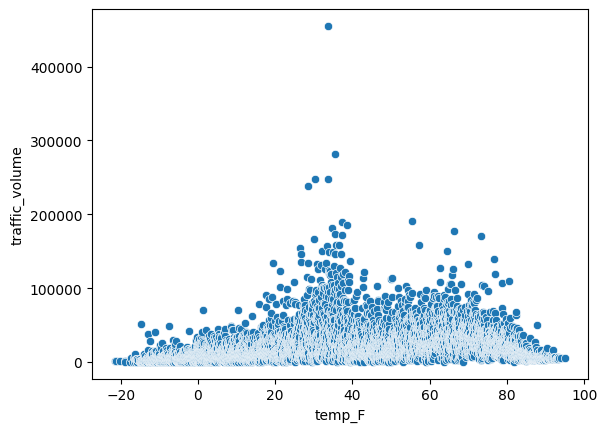

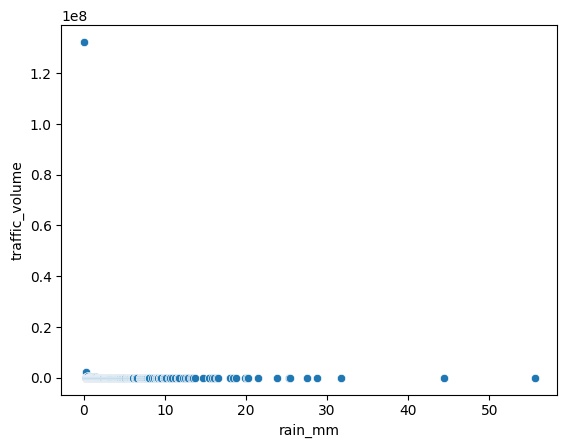

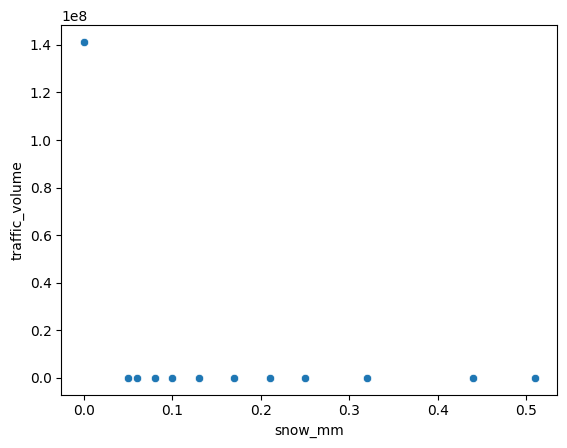

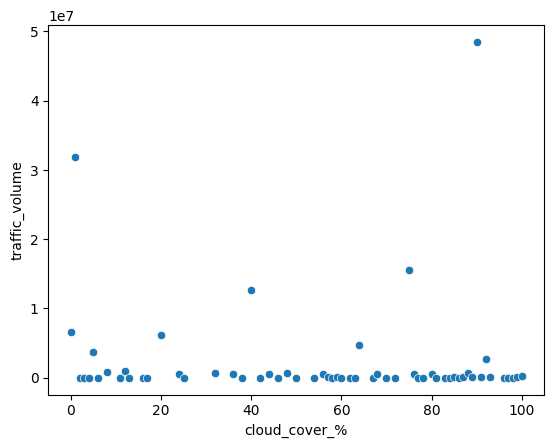

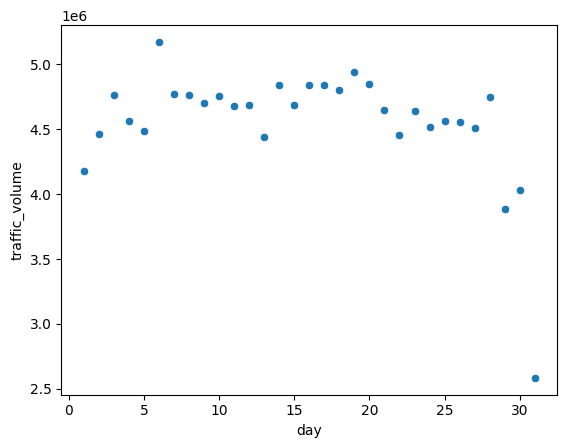

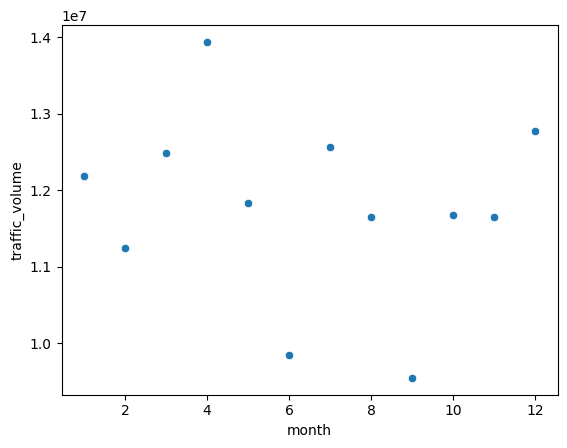

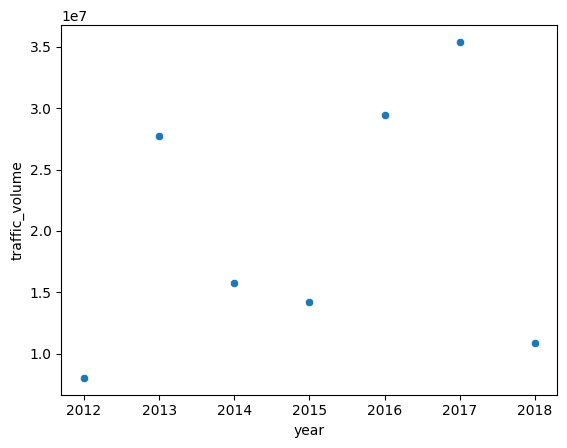

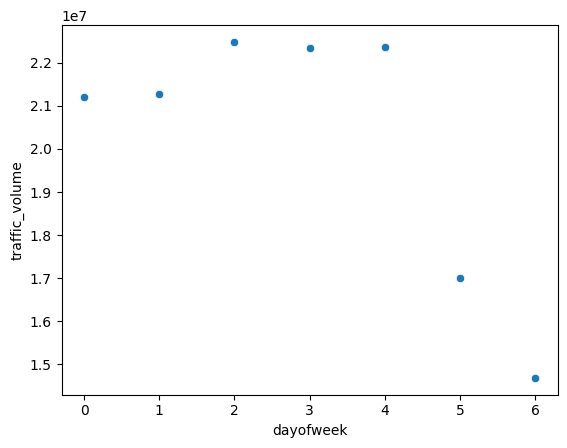

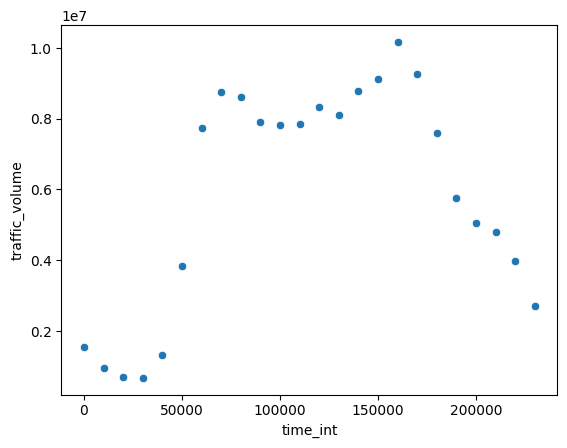

In [21]:

for col in ['temp_F', 'rain_mm', 'snow_mm', 'cloud_cover_%', 'day','month', 'year', 'dayofweek', 'time_int']:
    dfg = dfg = pd.DataFrame(df.groupby([col])['traffic_volume'].sum()).reset_index()
    ax = sns.scatterplot(x=dfg[col], y=dfg['traffic_volume'])
    plt.show()

Observations:
1. As the temperature gets better, traffic volume increases.
2. No rain and and no snow are highly correlated with higher traffic.
3. It looks like that cloud cover has an impact, but its not clear from the graph.
4. we have almost no data in 2015.
5. There is a correlation with time and that will be an important feature.
6. As expected the traffic is low on weekends.

In [22]:
df = pd.get_dummies(df, columns=['holiday', 'weather_type'], drop_first=True)

In [23]:
train_df = df.drop(columns=['date_time','time'])

In [24]:
train_df

,temp_F,rain_mm,snow_mm,cloud_cover_%,traffic_volume,day,month,year,dayofweek,time_int,...,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm
0,59.23,0.0,0.0,40,5545,2,10,2012,1,90000,...,True,False,False,False,False,False,False,False,False,False
1,61.18,0.0,0.0,75,4516,2,10,2012,1,100000,...,True,False,False,False,False,False,False,False,False,False
2,61.57,0.0,0.0,90,4767,2,10,2012,1,110000,...,True,False,False,False,False,False,False,False,False,False
3,62.56,0.0,0.0,90,5026,2,10,2012,1,120000,...,True,False,False,False,False,False,False,False,False,False
4,64.38,0.0,0.0,75,4918,2,10,2012,1,130000,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43707,81.90,0.0,0.0,1,3259,30,4,2018,0,190000,...,False,False,False,False,False,False,False,False,False,False
43708,79.77,0.0,0.0,1,2673,30,4,2018,0,200000,...,False,False,False,False,False,False,False,False,False,False
43709,76.66,0.0,0.0,1,2329,30,4,2018,0,210000,...,False,False,False,False,False,False,False,False,False,False
43710,74.25,0.0,0.0,40,1594,30,4,2018,0,220000,...,True,False,False,False,False,False,False,False,False,False


In [25]:
train_df.columns

Index(['temp_F', 'rain_mm', 'snow_mm', 'cloud_cover_%', 'traffic_volume',
       'day', 'month', 'year', 'dayofweek', 'time_int', 'holiday_Columbus Day',
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day',
       'holiday_New Years Day', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday', 'holiday_not-a-holiday',
       'weather_type_Clouds', 'weather_type_Drizzle', 'weather_type_Fog',
       'weather_type_Haze', 'weather_type_Mist', 'weather_type_Rain',
       'weather_type_Smoke', 'weather_type_Snow', 'weather_type_Squall',
       'weather_type_Thunderstorm'],
      dtype='object')

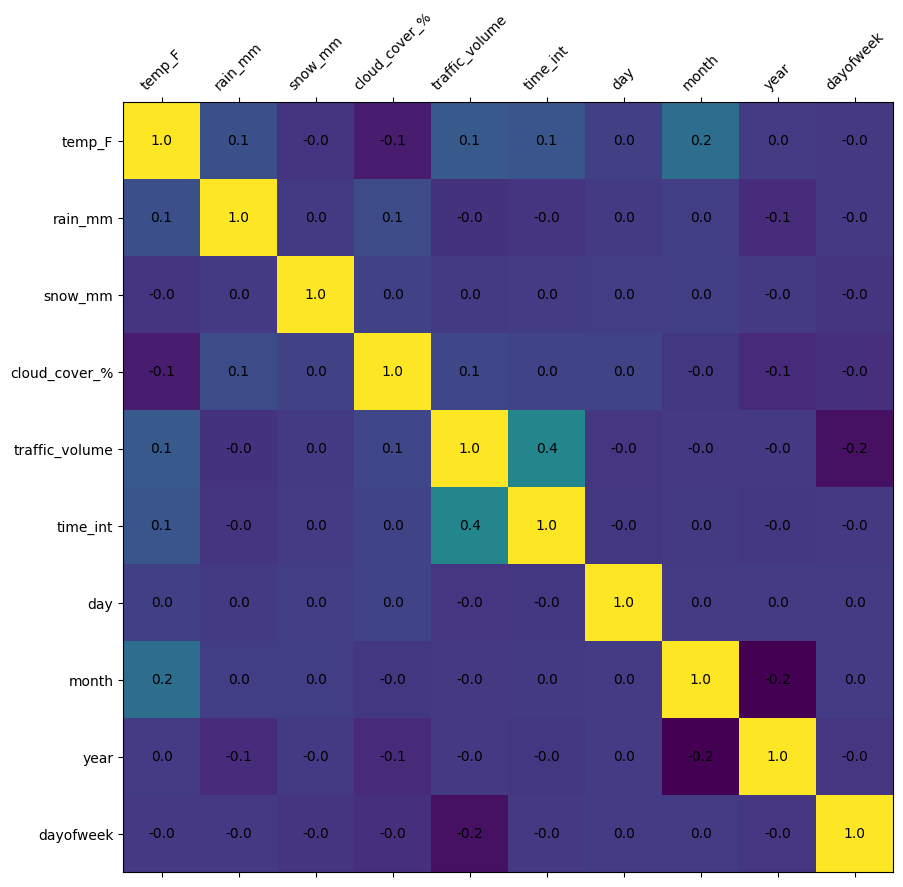

In [26]:
#get correlation
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(train_df[['temp_F', 'rain_mm', 'snow_mm', 'cloud_cover_%', 'traffic_volume',
       'time_int', 'day', 'month', 'year', 'dayofweek']])

 time has a high correlation with traffic. It will do well for regression. Not sure about others. 
 But we are anyways going to try multiple algorithms. 

In [27]:
# save data as csv
train_df.to_csv('train_traffic.csv', index=False)